In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("Titanic_train.csv",index_col=0)
df_test=pd.read_csv("Titanic_test.csv",index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


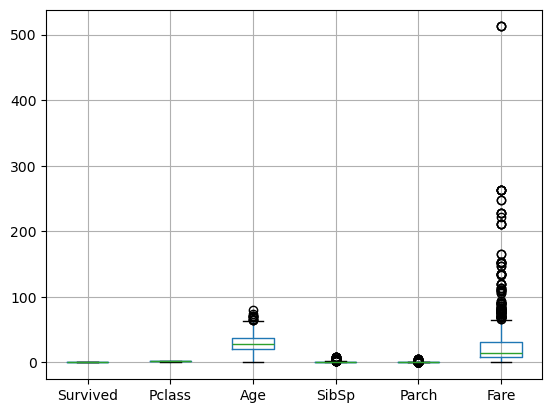

In [4]:
df.boxplot()
plt.show()

In [5]:
#the above boxplot shows some outlier in age which is ok as person can be old , outlier in fare needs capping

In [6]:
def capping(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [7]:
capping(df, ['Fare'])


<Axes: >

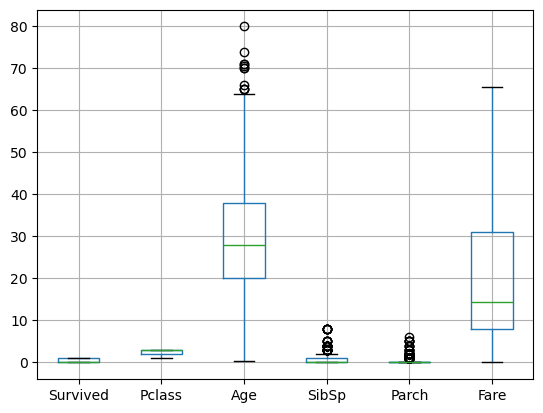

In [8]:
df.boxplot()

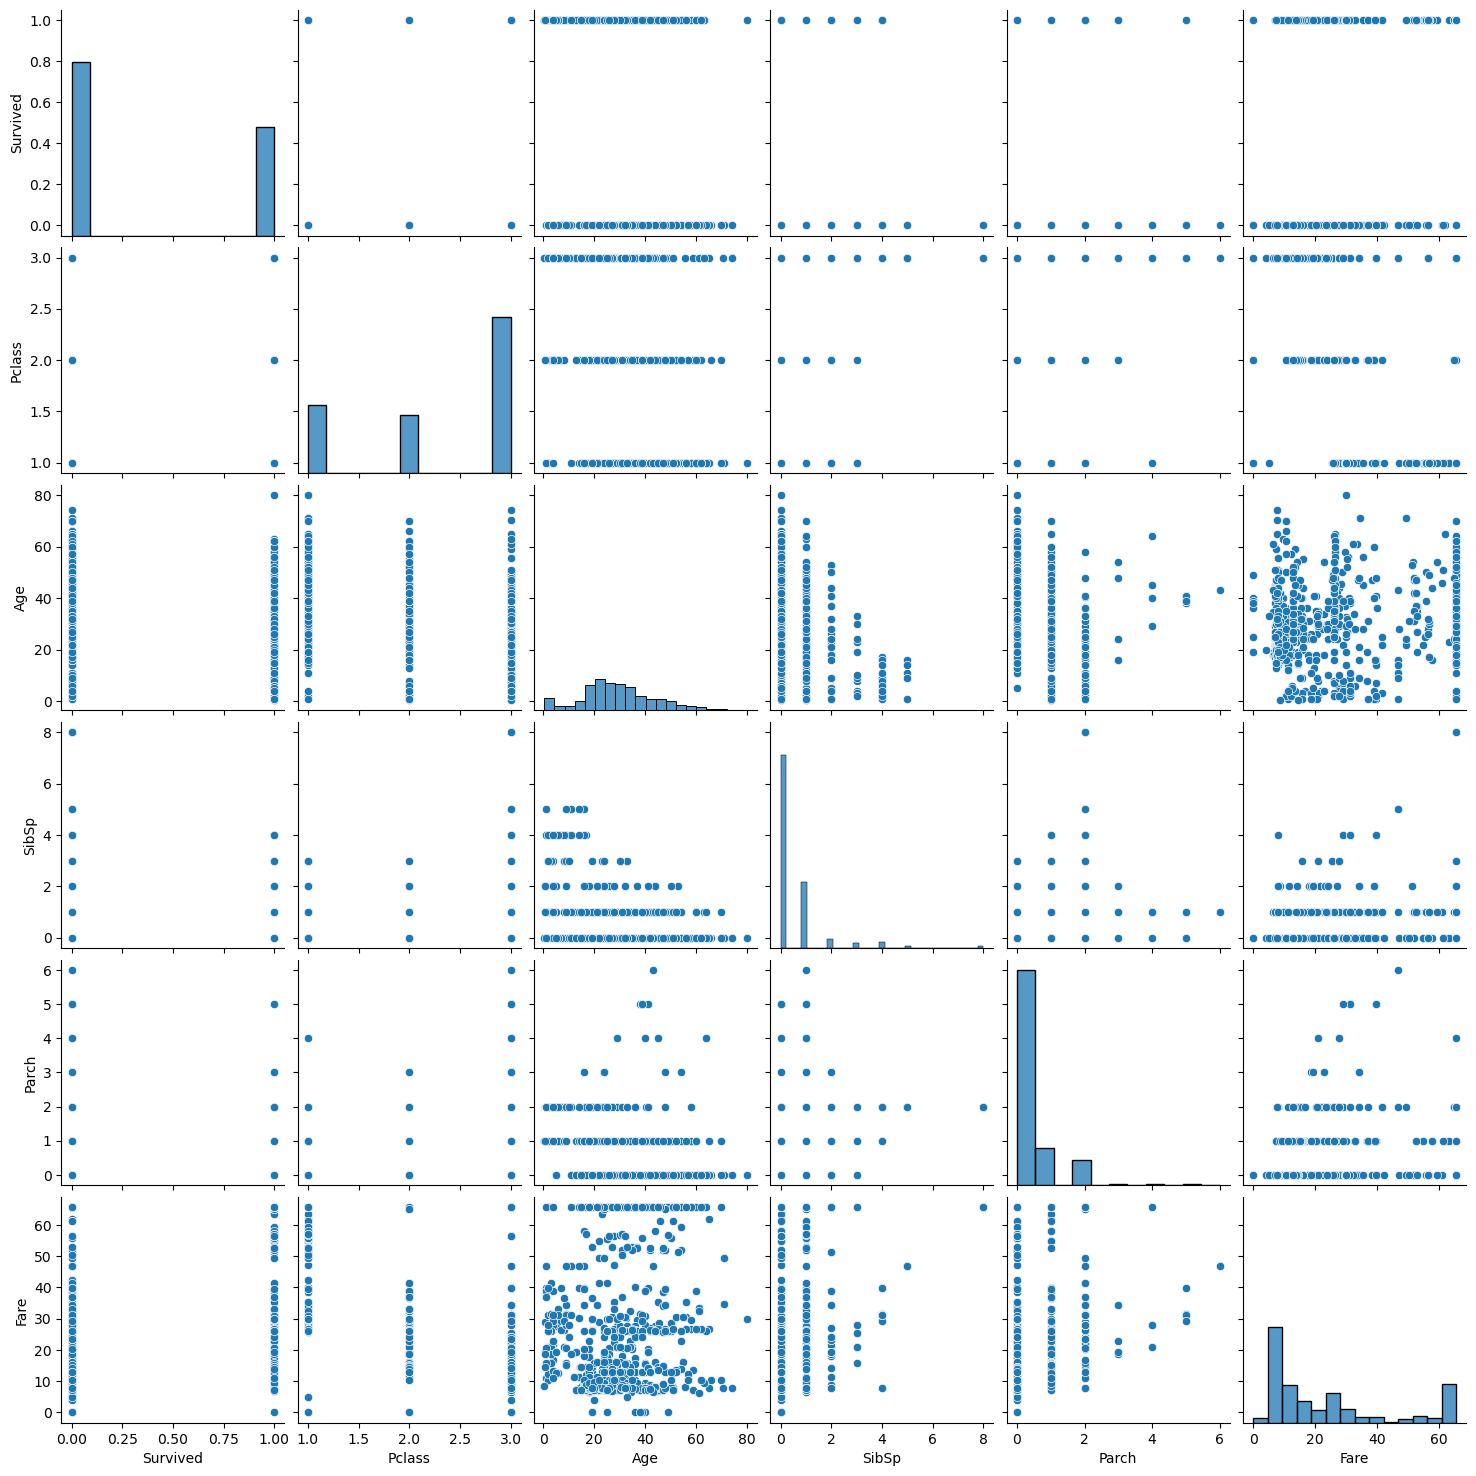

In [9]:
sns.pairplot(df)
plt.show()

<Axes: >

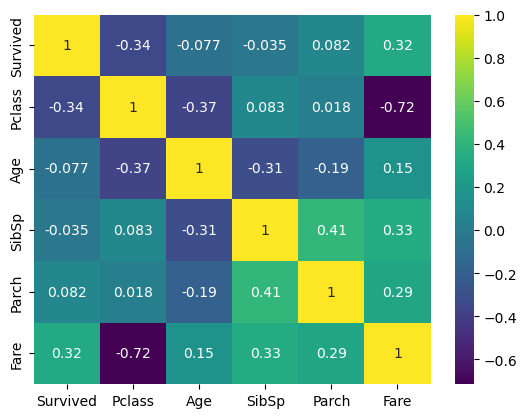

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='viridis')

In [11]:
#from the above heatmap we can say that the customers who paid higher fare and higher class had higher survival rate 

In [12]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
#since there are more na values in Cabin it is better to drop it
df.drop('Cabin',axis=1,inplace=True)

In [14]:
median_ages = df.groupby(['Pclass', 'Sex'])['Age'].transform('median')
df['Age'].fillna(median_ages, inplace=True)

In [15]:
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)

In [16]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [17]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [18]:
#encoding for sex column in 1 column for male=true andfemale =false, also embarked encoded into c q s and class 1 2 3  
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df = pd.get_dummies(df, columns=['Embarked', 'Pclass'], prefix=['Embarked', 'Pclass'])

In [19]:
df

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,True,False,False,True,False,False,True
2,1,38.0,1,0,65.6344,False,True,False,False,True,False,False
3,1,26.0,0,0,7.9250,False,False,False,True,False,False,True
4,1,35.0,1,0,53.1000,False,False,False,True,True,False,False
5,0,35.0,0,0,8.0500,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,13.0000,True,False,False,True,False,True,False
888,1,19.0,0,0,30.0000,False,False,False,True,True,False,False
889,0,21.5,1,2,23.4500,False,False,False,True,False,False,True


In [20]:
from sklearn.linear_model import LogisticRegression as lg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score,roc_auc_score, roc_curve

In [21]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
lg=lg(random_state=42, max_iter=1000)

In [24]:
lg.fit(X_train.values,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
y_pred_val = lg.predict(X_val.values)
accuracy = accuracy_score(y_val, y_pred_val)

In [26]:
confusion_matrix(y_val, y_pred_val)

array([[98, 12],
       [23, 46]], dtype=int64)

<Axes: >

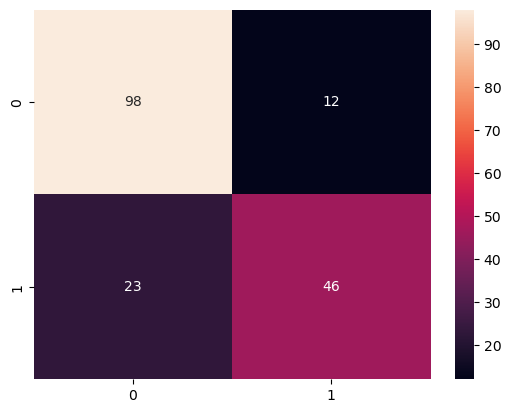

In [27]:
sns.heatmap(confusion_matrix(y_val, y_pred_val),annot = True,fmt = 'g')

In [28]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [29]:
y_pred_proba_val = lg.predict_proba(X_val.values)[:, 1]
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
roc_auc = roc_auc_score(y_val, y_pred_proba_val)

In [30]:
print("--- Model Evaluation on Validation Set ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")
print("-" * 40)


--- Model Evaluation on Validation Set ---
Accuracy:  0.8045
Precision: 0.7931
Recall:    0.6667
F1-Score:  0.7244
ROC-AUC:   0.8385
----------------------------------------


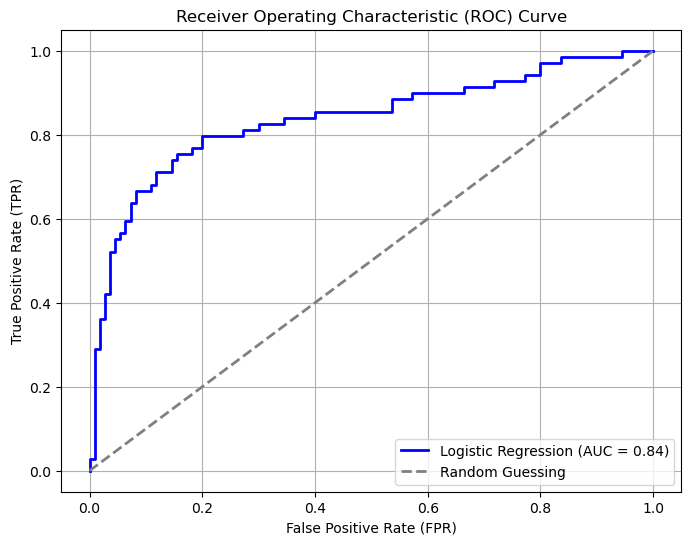

In [31]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_val)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guessing') # Baseline
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [32]:
#AUC is 0.84 that is model is good